# Assignment 2

In [23]:
#by Zoya Fatima (20BCE1102)

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('titanic.csv')


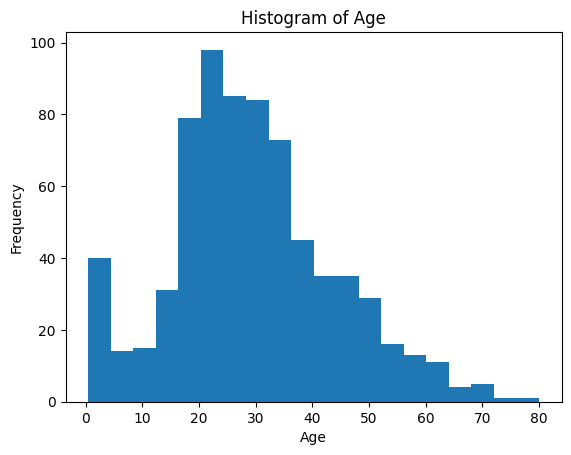

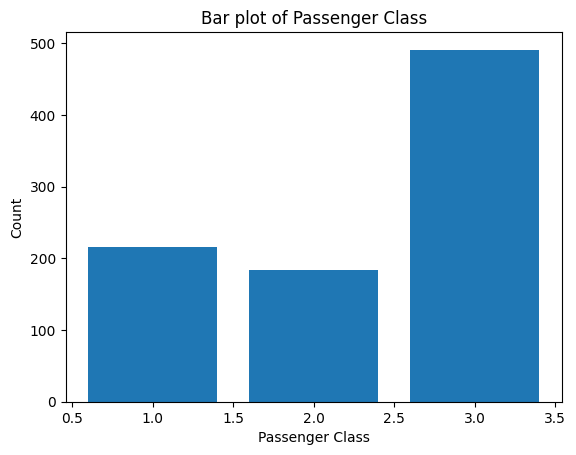

In [3]:
import matplotlib.pyplot as plt

# Histogram of Age
plt.hist(df['age'].dropna(), bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

# Bar plot of Passenger Class
class_counts = df['pclass'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.title('Bar plot of Passenger Class')
plt.show()


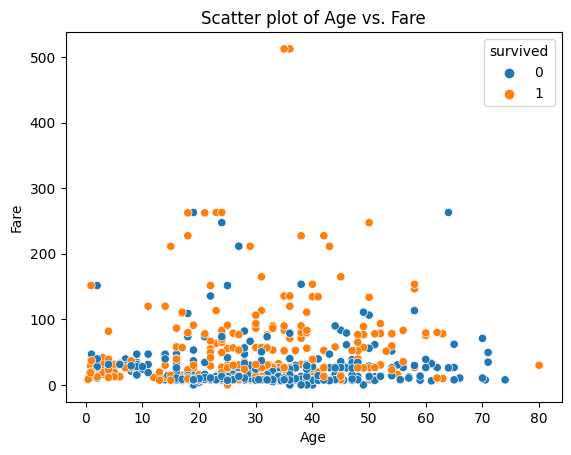

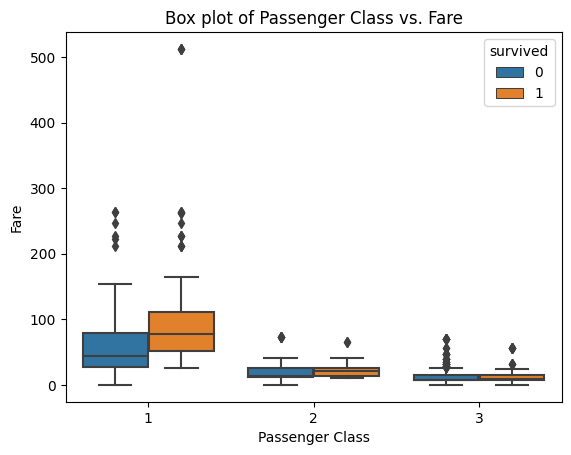

In [4]:
import seaborn as sns

# Scatter plot of Age vs. Fare
sns.scatterplot(data=df, x='age', y='fare', hue='survived')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter plot of Age vs. Fare')
plt.show()

# Box plot of Passenger Class vs. Fare
sns.boxplot(data=df, x='pclass', y='fare', hue='survived')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.title('Box plot of Passenger Class vs. Fare')
plt.show()


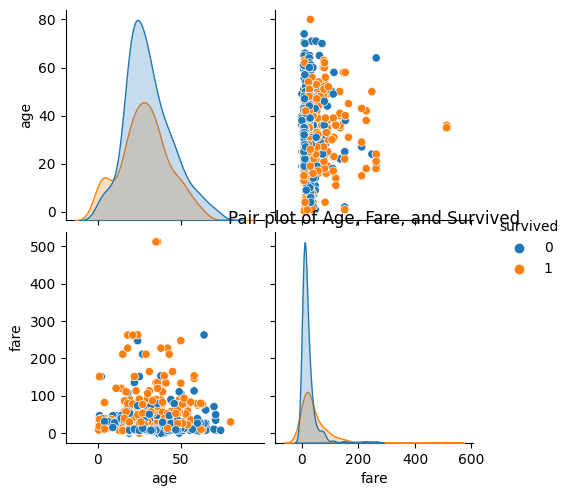

In [6]:
# Pair plot of Age, Fare, and Survived
sns.pairplot(data=df[['age', 'fare', 'survived']], hue='survived')
plt.title('Pair plot of Age, Fare, and Survived')
plt.show()


In [13]:
# Descriptive statistics
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [16]:
# Check for missing values
df.isnull().sum()

# Handle missing values in Age by filling with mean
df['age'].fillna(df['age'].mean(), inplace=True)



In [17]:
# Detect outliers in Fare using IQR method
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR

# Replace outliers with the upper limit value
df.loc[df['fare'] > upper_limit, 'fare'] = upper_limit


In [18]:
# Check for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns)


In [20]:
# Split the data into dependent (target) and independent variables
X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']


In [21]:
# Scale the independent variables using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [22]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
